## Customer Churn Analysis

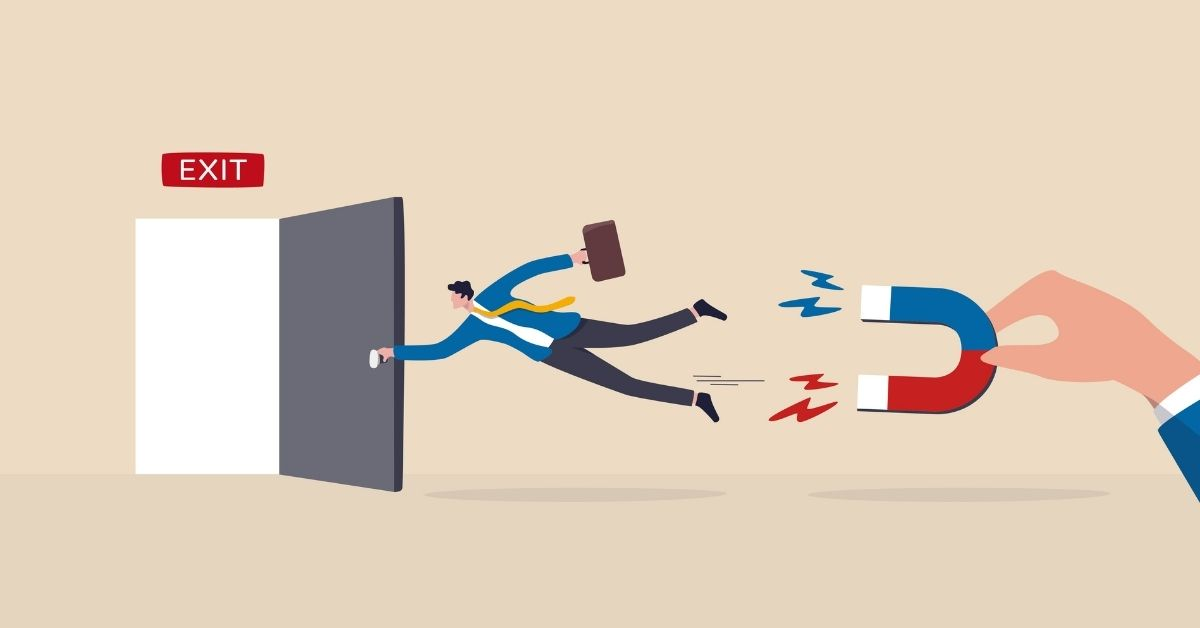

#### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [208]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/Telecom_customer_churn.csv")
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

### Data Analysis

In [209]:
df.head(5)  # checking first rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [210]:
df.tail(5)   # checking last rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [211]:
df.sample(5)  # checking random rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5237,6261-LHRTG,Female,0,No,No,26,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),54.75,1406.9,No
6082,4523-WXCEF,Female,0,Yes,No,59,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.10,6039.9,Yes
1968,5447-WZAFP,Female,0,No,No,53,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Mailed check,100.30,5200.8,No
6868,1195-OIYEJ,Male,0,No,No,13,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,91.10,1135.7,Yes
6572,6258-PVZWJ,Male,0,Yes,No,68,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.80,6302.85,No


In [212]:
df.shape # checking size of the dataset

(7043, 21)

#### Checking some more dataset rows for better understandings

In [213]:
df.sample(25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6276,5003-OKNNK,Female,0,Yes,Yes,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.35,335.95,No
4272,1043-YCUTE,Male,0,Yes,No,56,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.15,1327.15,Yes
5967,5167-GBFRE,Male,1,No,No,4,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),25.20,102.5,Yes
5895,8033-ATFAS,Female,0,Yes,Yes,39,Yes,No,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,59.85,2341.5,No
1657,4163-KIUHY,Male,0,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.60,901.25,No
1595,2761-OCIAX,Male,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,165.4,Yes
1725,5935-FCCNB,Female,1,No,No,17,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,1608.15,No
4177,3470-BTGQO,Male,0,No,Yes,21,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.65,985.05,No
3473,7599-FKVXZ,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),106.15,4512.7,Yes
5489,0804-XBFBV,Female,0,No,Yes,11,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,25.20,321.05,No


### Checking columns

In [214]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Checking Target Variables

No     5174
Yes    1869
Name: Churn, dtype: int64


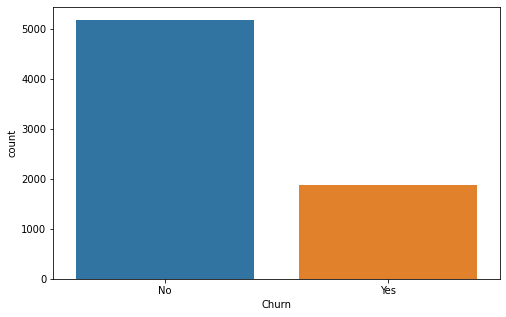

In [215]:
plt.figure(figsize = (8,5))
target = df.Churn.value_counts()
print(target)
target = sns.countplot(df.Churn)

#### Observations of the target variable
- From above Churn we can see that dataset are in imbalance count hence we need to fix it further for better performance model later

In [216]:

df.dtypes  # checking datatypes of the dataset

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Observations:
- customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn' are of object types columns
       
- SeniorCitizen', 'tenure', 'MonthlyCharges' are of numerical columns

In [217]:
df.info()  # checking basic summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [218]:
for i in df.columns:
    print(i, df[i].unique().shape)

customerID (7043,)
gender (2,)
SeniorCitizen (2,)
Partner (2,)
Dependents (2,)
tenure (73,)
PhoneService (2,)
MultipleLines (3,)
InternetService (3,)
OnlineSecurity (3,)
OnlineBackup (3,)
DeviceProtection (3,)
TechSupport (3,)
StreamingTV (3,)
StreamingMovies (3,)
Contract (3,)
PaperlessBilling (2,)
PaymentMethod (4,)
MonthlyCharges (1585,)
TotalCharges (6531,)
Churn (2,)


#### From above observations we find that SeniorCitizen's data type is integer while it having only two variable. And in case of TotalCharges dataset column having 6531 unique values but datatype setted as object and we know that charges can't be object in this case. 
**Hence we need to convert these columns.**

#### SeniorCitizen

In [232]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

#### TotalCharges

#### We find that some of rows in TotalCharges are blank hence we need to first fix these columns

In [220]:
df.replace(" ", np.NaN, inplace = True)  # replacing blank spaces with NaN

#### Checking Null Values

In [221]:
df.isnull().sum()/len(df)*100  # checking null values percentage

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

#### As we can see that total charges having null values upto 0.15 percent hence we can drop it.

In [222]:
df.dropna(inplace = True)  # droping NaN values

In [223]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [224]:
df['TotalCharges'].dtypes

dtype('float64')

In [225]:
df.describe()  # checking overall summary of the dataset

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [226]:
df.describe(include = 'all')  # checking overall statiscal summary of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


<AxesSubplot:>

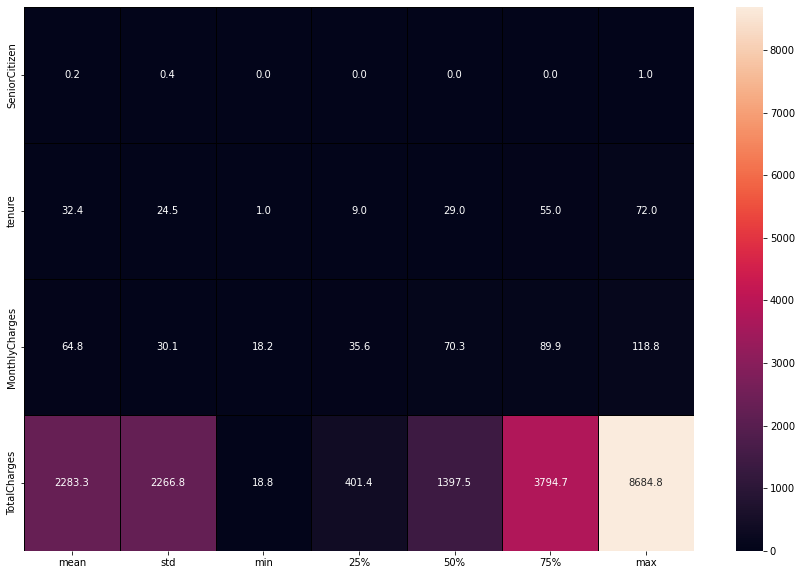

In [227]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), linewidths = 1, linecolor = 'black', annot = True, fmt = '.1f' )

#### From above observations we find that TotalCharges values are very much higher than its overall dataset hence this column dataset prbably having outliers.


#### Checking Null Values

In [228]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

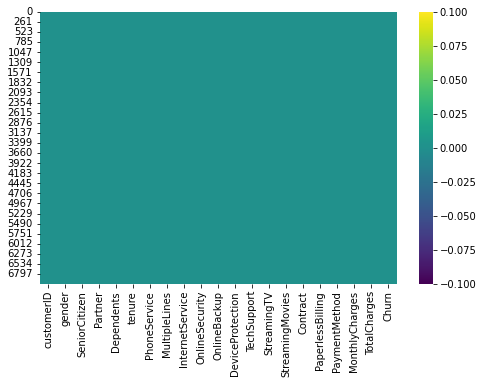

In [229]:
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cmap = 'viridis')

#### Checking duplicated values

In [230]:
df.duplicated().sum() # duplicate values counts of the dataset 

0

### Exploratory Data Analysis

In [233]:
df.dtypes # checking datatypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [234]:
df.head(2)  # checking dataset after recitfying columns datatypes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### Dropping Columns which are not liable in model learning

#### customerID is just a unique ID of customer to identify customer which can't help in model prediction hence we can drop this column.

In [235]:
df.drop(['customerID'], inplace = True, axis = 1)

In [236]:
df.head(1) # checking dataset after dropping customer id

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [237]:
for i in df.columns:
    print(i, "column having ", df[i].nunique(), "unique values", "\n")

gender column having  2 unique values 

SeniorCitizen column having  2 unique values 

Partner column having  2 unique values 

Dependents column having  2 unique values 

tenure column having  72 unique values 

PhoneService column having  2 unique values 

MultipleLines column having  3 unique values 

InternetService column having  3 unique values 

OnlineSecurity column having  3 unique values 

OnlineBackup column having  3 unique values 

DeviceProtection column having  3 unique values 

TechSupport column having  3 unique values 

StreamingTV column having  3 unique values 

StreamingMovies column having  3 unique values 

Contract column having  3 unique values 

PaperlessBilling column having  2 unique values 

PaymentMethod column having  4 unique values 

MonthlyCharges column having  1584 unique values 

TotalCharges column having  6530 unique values 

Churn column having  2 unique values 



### Dividing columns into object and numerical categories for easy visualization understandings

In [238]:
df_object = df.select_dtypes(include = 'object').columns  # object dataset columns
df_num = df.select_dtypes(exclude = 'object').columns  # numerical dataset columns

In [239]:
df_object  # checking object columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [240]:
df_num  # checking non object columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [241]:
for i in df_object:
    print("--------------"+i+"---------------------",'\n' ,df[i].value_counts(), "\n")  # checking unique counts

--------------gender--------------------- 
 Male      3549
Female    3483
Name: gender, dtype: int64 

--------------SeniorCitizen--------------------- 
 0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

--------------Partner--------------------- 
 No     3639
Yes    3393
Name: Partner, dtype: int64 

--------------Dependents--------------------- 
 No     4933
Yes    2099
Name: Dependents, dtype: int64 

--------------PhoneService--------------------- 
 Yes    6352
No      680
Name: PhoneService, dtype: int64 

--------------MultipleLines--------------------- 
 No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

--------------InternetService--------------------- 
 Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

--------------OnlineSecurity--------------------- 
 No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype:

### Bar Plot

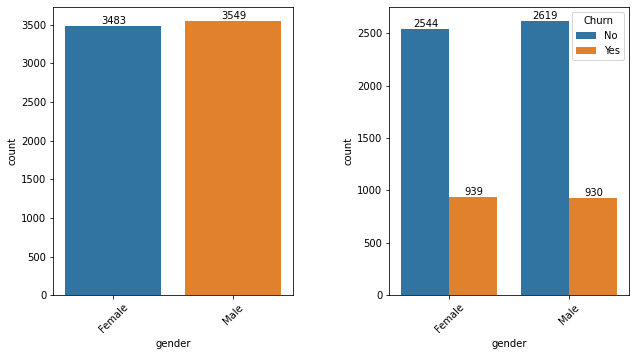

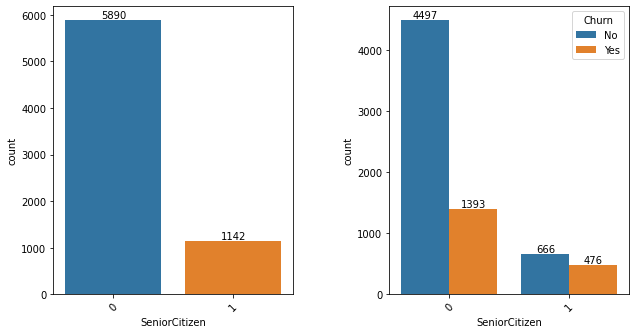

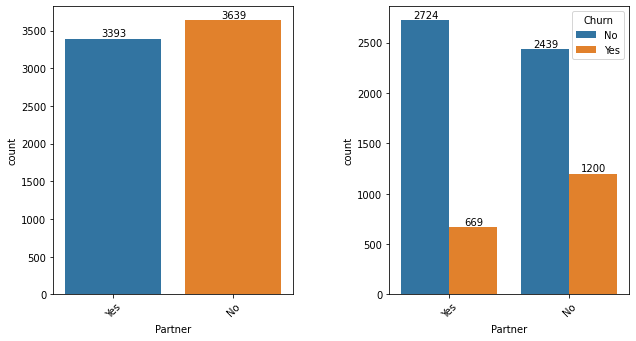

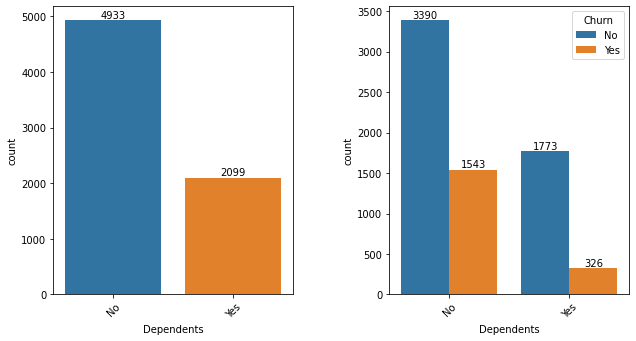

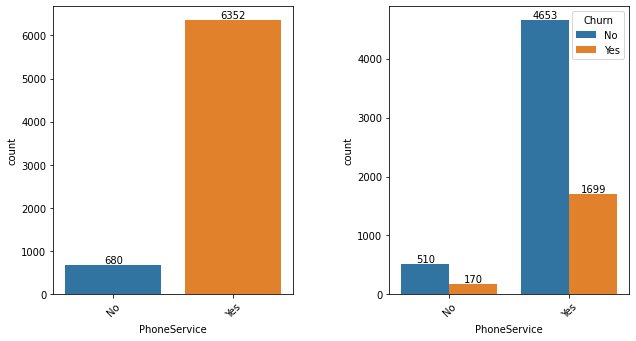

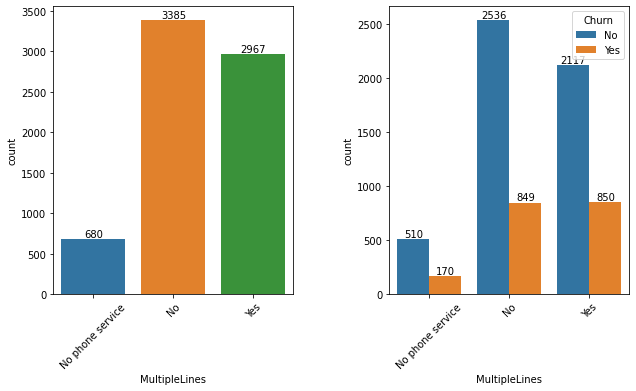

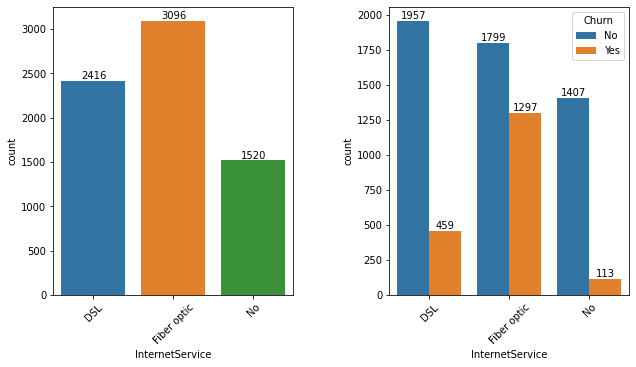

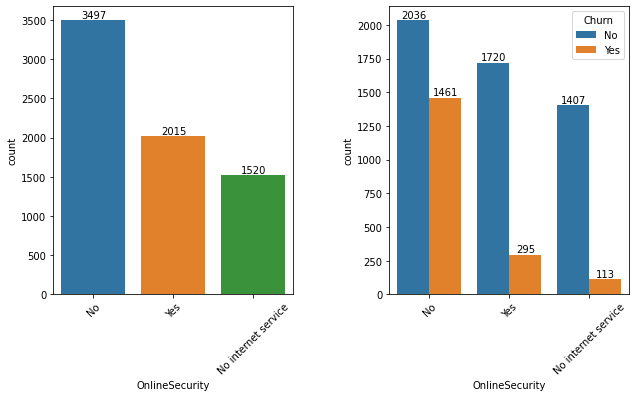

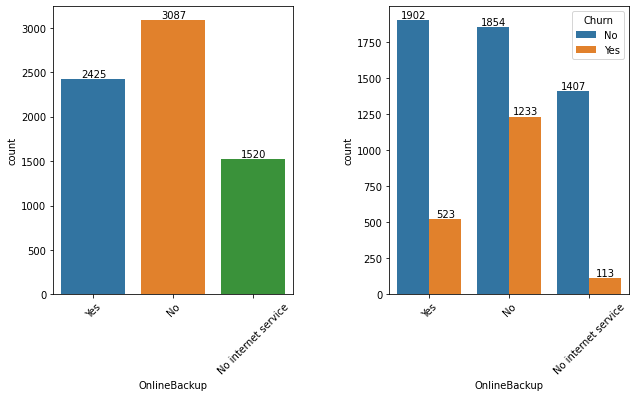

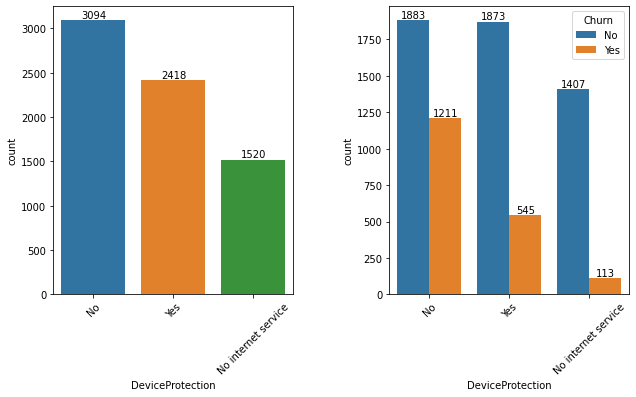

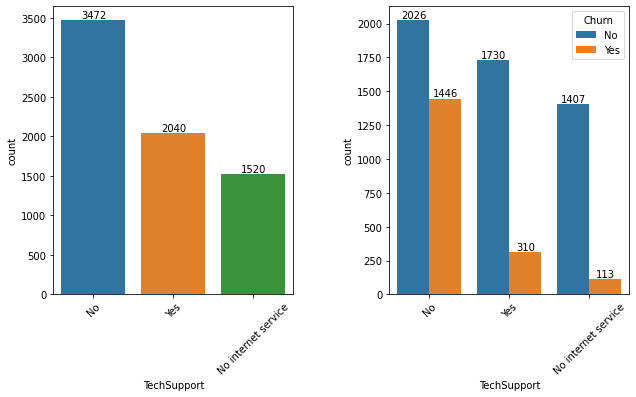

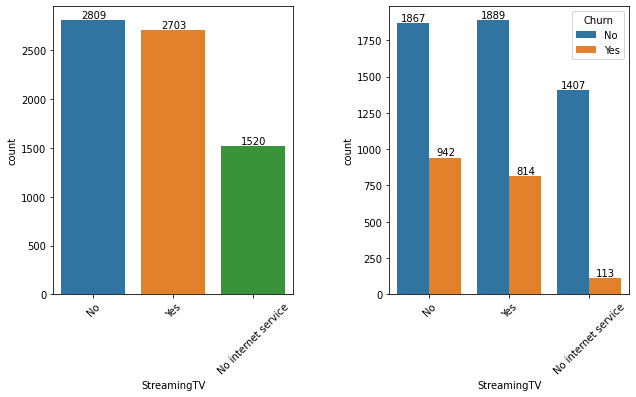

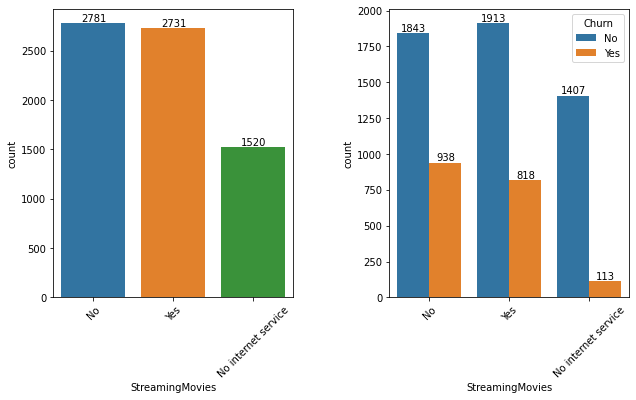

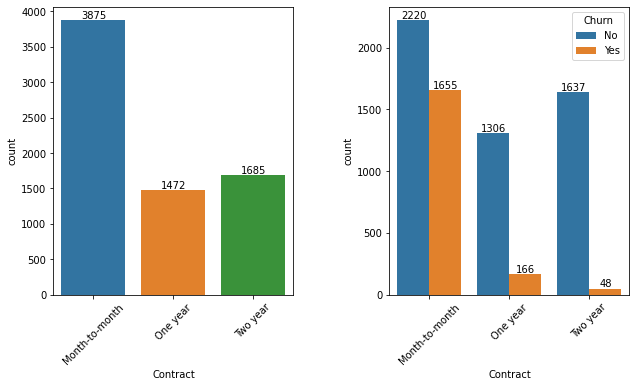

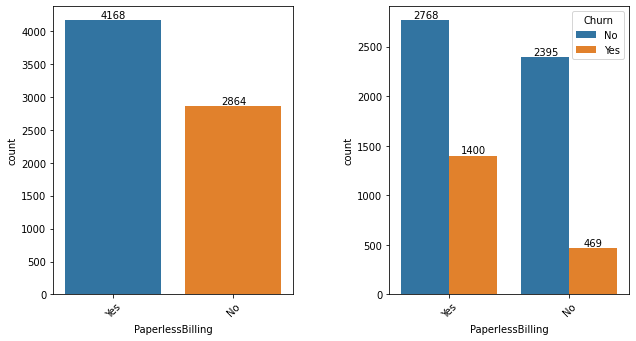

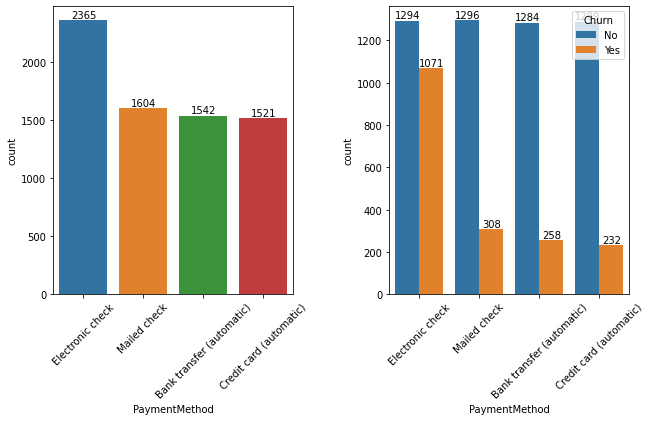

In [242]:
for i in df_object[:-1]:    
    plt.figure(figsize= (10, 5))
    l = list(df[i].unique())
    plt.subplot(1,2,1)
    bar = sns.countplot(df[i])
    bar.set_xticklabels(labels = l, rotation = 45)
    for j in bar.containers:
        bar.bar_label(j)

    
    plt.subplot(1,2,2)
    bar = sns.countplot(df[i], hue = df['Churn'])
    bar.set_xticklabels(labels = l, rotation = 45)
    for j in bar.containers:
        bar.bar_label(j)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

    
#     plt.subplot(1,3,3)
#     graph = df[i].value_counts()
#     plt.figure(figsize = (5,5))
#     graph.plot(kind = 'pie', autopct = '%1.1f%%')

    plt.show()

### Observations: 

In [109]:
# gender  Churn    Counts
# Female  No       2544
#         Yes       939
# Male    No       2619
#         Yes       930

# Female customer churn more as comparison to male customer as per graph.

    
# SeniorCitizen  Churn    Counts
# 0              No       4497
#                Yes      1393
# 1              No        666
#                Yes       476


# 0 values means non seniorcitizen count of churn is much higher than senior citizen customers as we can see that 
# on above graph. It is due to that most of the senior citizen are not liable to use internet services.


    
# Partner  Churn   Counts
# No       No       2439
#          Yes      1200
# Yes      No       2724
#          Yes       669


# No Partner customer churn more as compare to Partner customers as per dataset.

    
# Dependents  Churn   Counts
# No          No       3390
#             Yes      1543
# Yes         No       1773
#             Yes       326
    
# No Dependents customer churn more as comparison to Yes Dependents as per graph.


    
# PhoneService  Churn    Counts
# No            No        510
#               Yes       170
# Yes           No       4653
#               Yes      1699

# PhoneService customer are churn more as they are using phone and internet services in comparison to No PhoneService customers.

    
# MultipleLines     Churn    Counts
# No                No       2536
#                   Yes       849
# No phone service  No        510
#                   Yes       170
# Yes               No       2117
#                   Yes       850

# Customer with MultipleLines and No MultipleLines churn yes same as it is. There is only 1 count different.
    
# InternetService  Churn   Counts
# DSL              No       1957
#                  Yes       459
# Fiber optic      No       1799
#                  Yes      1297
# No               No       1407
#                  Yes       113


# Fiber optic customer churn more in comparison to DSL and NO internet service customer.

    
# OnlineSecurity       Churn   Counts
# No                   No       2036
#                      Yes      1461
# No internet service  No       1407
#                      Yes       113
# Yes                  No       1720
#                      Yes       295


# Customer with No online security are morer in comparison to No internet service or Yes online security as per dataset graph.

 
# OnlineBackup         Churn   Counts
# No                   No       1854
#                      Yes      1233
# No internet service  No       1407
#                      Yes       113
# Yes                  No       1902
#                      Yes       523

# Customer with No OnlineBackup are morer in comparison to No internet service or Yes onlinebackup as per dataset graph.


    
# DeviceProtection     Churn    Counts
# No                   No       1883
#                      Yes      1211
# No internet service  No       1407
#                      Yes       113
# Yes                  No       1873
#                      Yes       545

# Customer with No DeviceProtection are morer in comparison to No internet service or Yes DeviceProtection as per dataset graph.

    
# TechSupport          Churn   Counts
# No                   No       2026
#                      Yes      1446
# No internet service  No       1407
#                      Yes       113
# Yes                  No       1730
#                      Yes       310


# Customer with No TechSupport are morer in comparison to No internet service or Yes TechSupport as per dataset graph.


    
    
# StreamingTV          Churn   Counts
# No                   No       1867
#                      Yes       942
# No internet service  No       1407
#                      Yes       113
# Yes                  No       1889
#                      Yes       814


# No StreamingTV customer are more churn as per dataset graph.

    
# StreamingMovies      Churn   Counts
# No                   No       1843
#                      Yes       938
# No internet service  No       1407
#                      Yes       113
# Yes                  No       1913
#                      Yes       818

# No StreamingMovies customer are more churn as per dataset graph.
    
    
# Contract        Churn   Counts
# Month-to-month  No       2220
#                 Yes      1655
# One year        No       1306
#                 Yes       166
# Two year        No       1637
#                 Yes        48


# Month-to-month customer are more churn as comparison to one year and two year per dataset graph.
   
    
# PaperlessBilling  Churn   Counts
# No                No       2395
#                   Yes       469
# Yes               No       2768
#                   Yes      1400

 
# PaperlessBilling customer churn more in comparison to paperbilling as per graph.
    
# PaymentMethod              Churn   Counts
# Bank transfer (automatic)  No       1284
#                            Yes       258
# Credit card (automatic)    No       1289
#                            Yes       232
# Electronic check           No       1294
#                            Yes      1071
# Mailed check               No       1296
#                            Yes       308


# Payiing Electronic check type bill customers churn more in comparison to others payment method customers.

### Pie Chart

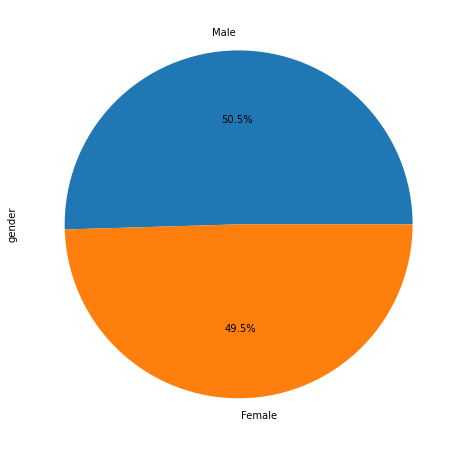

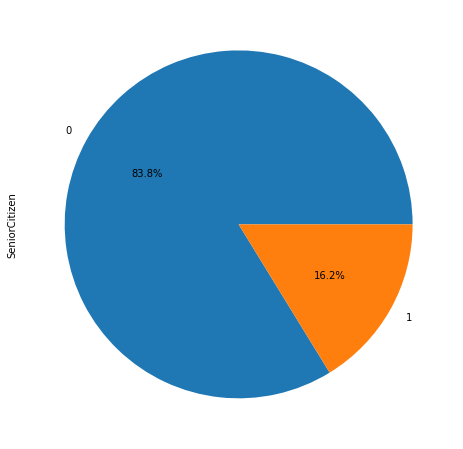

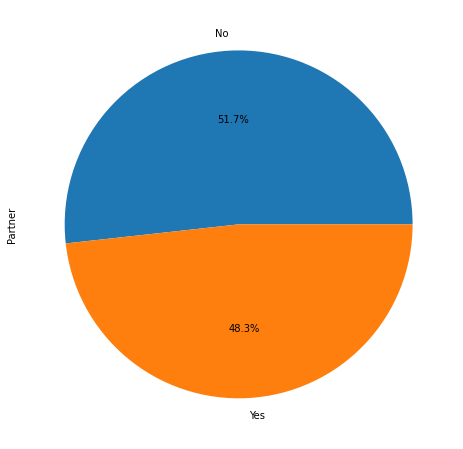

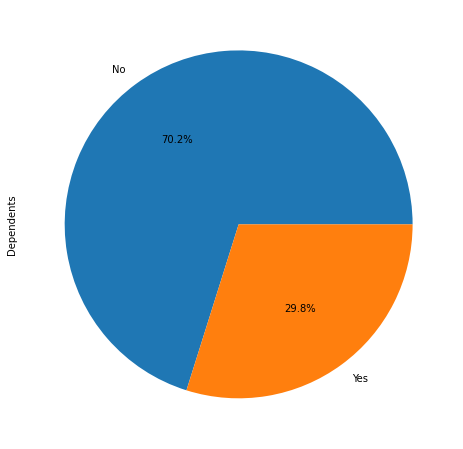

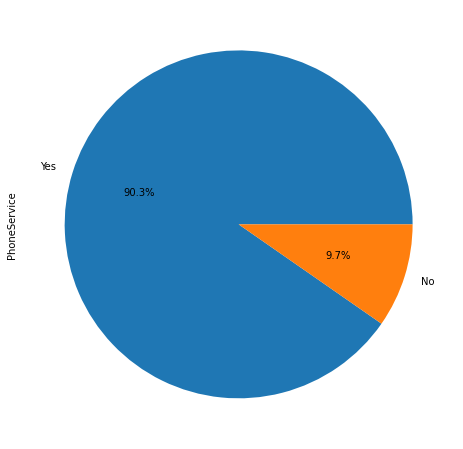

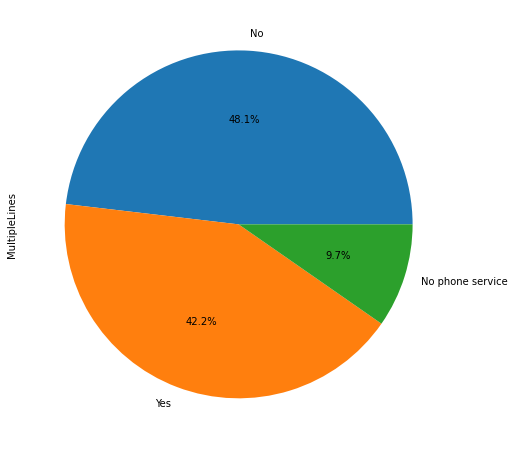

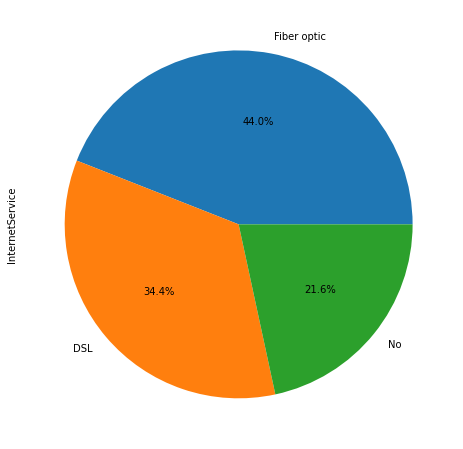

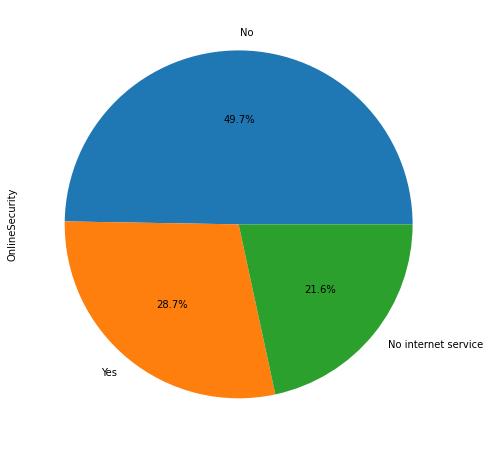

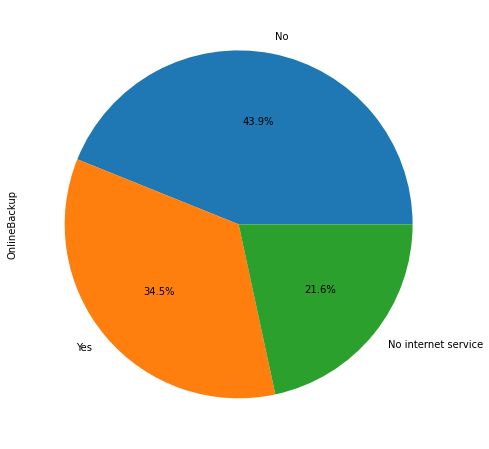

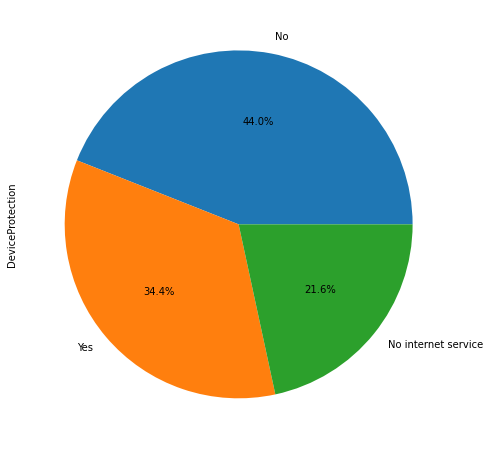

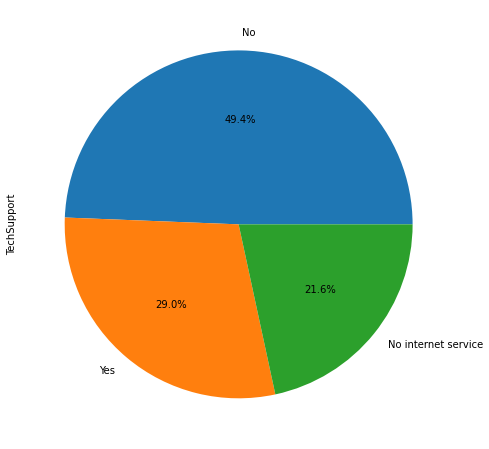

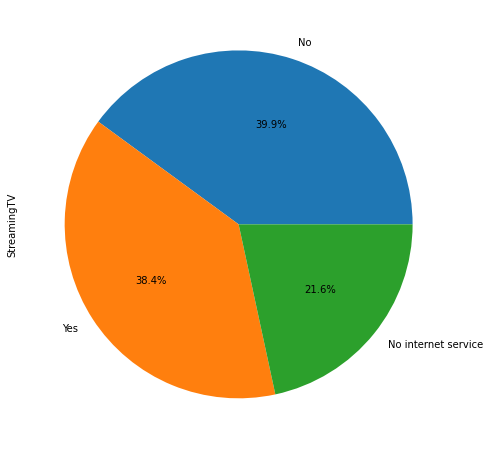

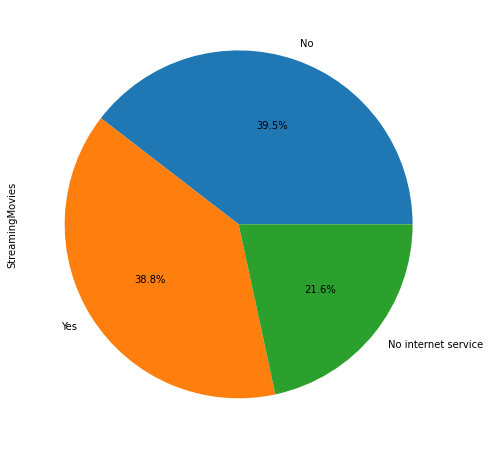

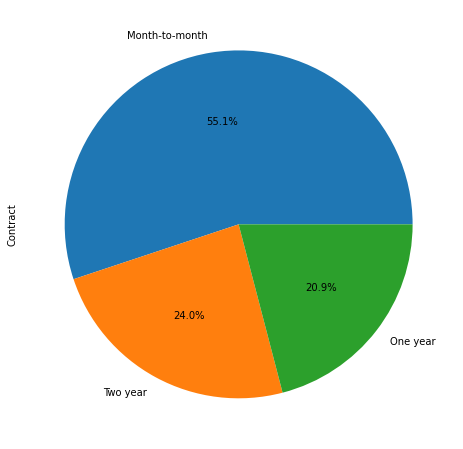

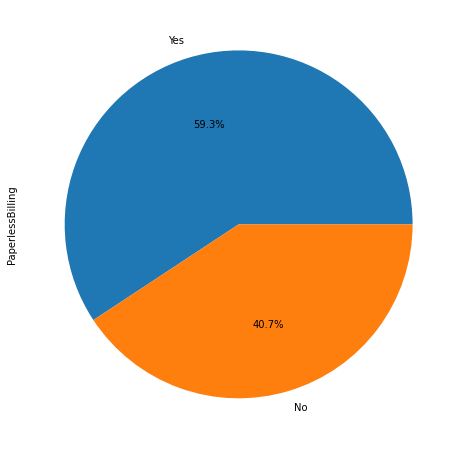

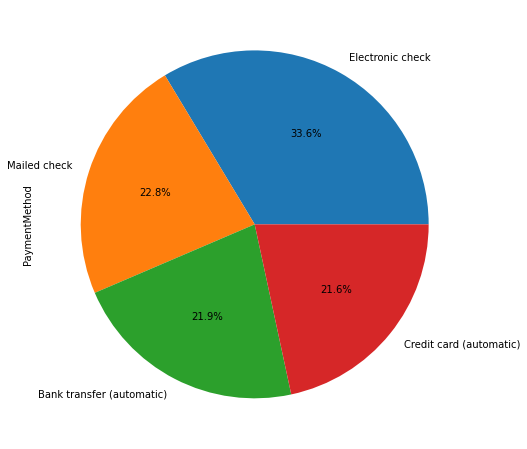

In [110]:
for i in df_object[:-1]:
    graph = df[i].value_counts()
    plt.figure(figsize = (10,8))
    graph.plot(kind = 'pie', autopct = '%1.1f%%')

### Observations;

- Male and Female customer as morely equal in number as per graph.


- Only 16.2 percentage customer are senior citizens rest are normal age customers.


- 51.7 % percent of the customer are No partner and 48.3 percent are with partner customers.


- 29.8% percent customer are dependents.


- 90.3 percent of the customer uses phone services.


- 48.1 ratio customer are not using multiple lines and 42.2 using multiple lines.


- 40 percent of the customer uses fiber optic and 21.6 percent of customer using no internet services.


- More than 40% percent of customer does not uses Online security, online backup, device protection and tech support.


- Likely 40% percent of customer does not streaming tv and movies.


- Month to month are more customer upto 55.1 ratio.


- Upto 59.3 percent prefer paperlessbilling.


- Electroniccheck are prefered more in payment among customer upto 33.6 percentage.


### Numerical Dataset

### Boxplot

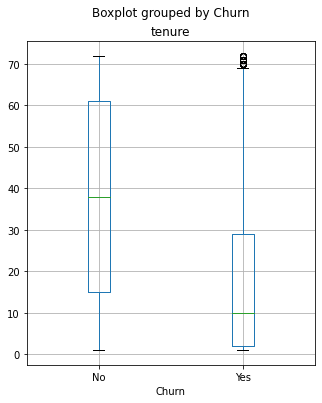

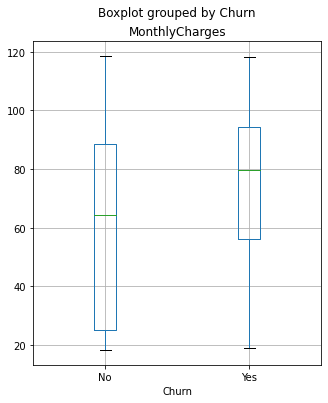

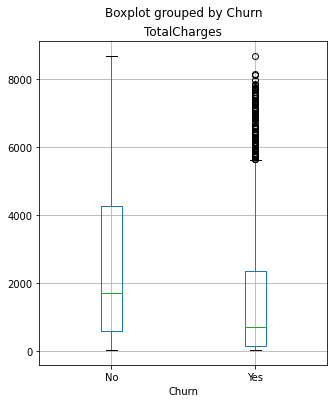

In [111]:
for i in df_num:
    df.boxplot(column = i, by = 'Churn', figsize = (5,6))    

### Observations:
    
- Tenure with churn yes having outliers as per above graph.

- TotalCharges with churn yes having outliers as per above graph.

### Categorical Plot

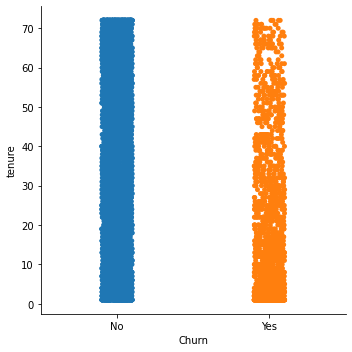

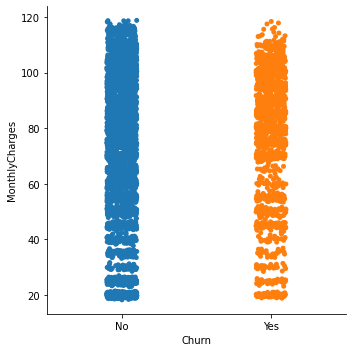

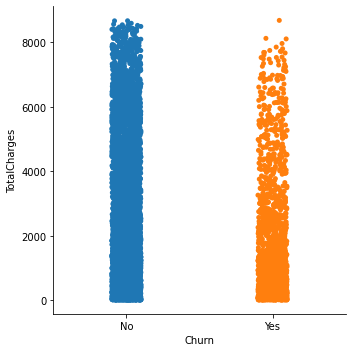

In [112]:
for i in df_num:
    sns.catplot(x = 'Churn', y = i, data = df)        

#### Observations:  As per above graphs, we find that most of the dataset having Churn No in higher amounts.

### Bivariate Analyis

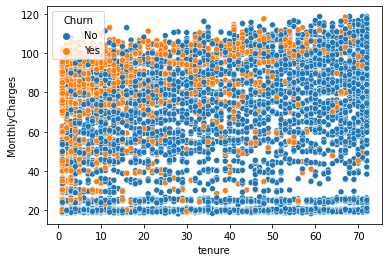

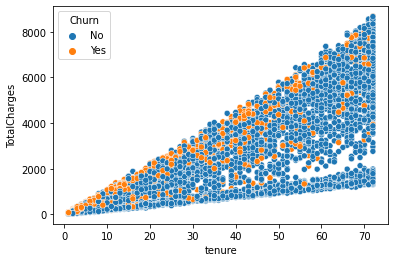

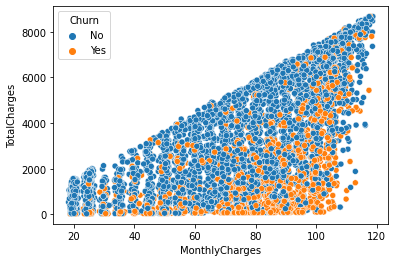

In [113]:
for i in range(len(df_num)):
    for j in df_num[i+1:]:
        plt.figure()
        sns.scatterplot(df[df_num[i]], df[j], hue = df['Churn'])

### Observations: TotalCharges shows linearly increament with respect to MonthlyCharges and tenure.

### Violin Plot

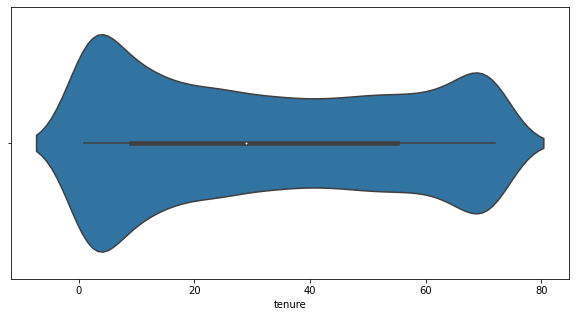

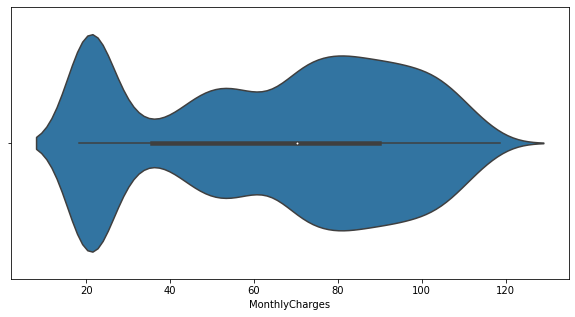

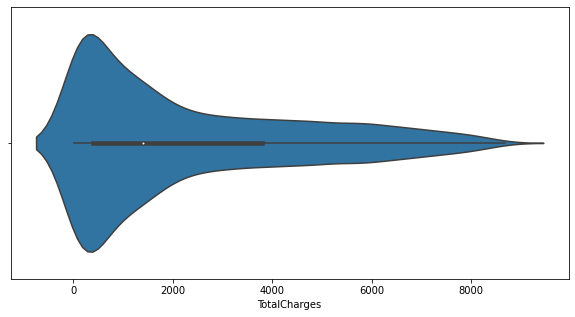

In [114]:
for i in df_num:
    plt.figure(figsize = (10,5))
    sns.violinplot(df[i] , data = df)
    
    
# checking spreading density of the data

### Checking Distribution of the Dataset

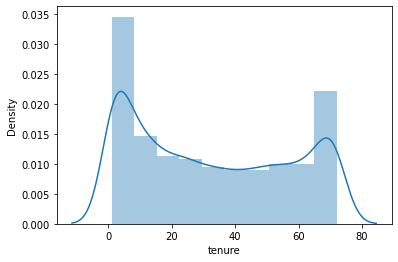

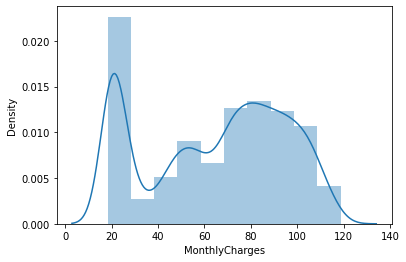

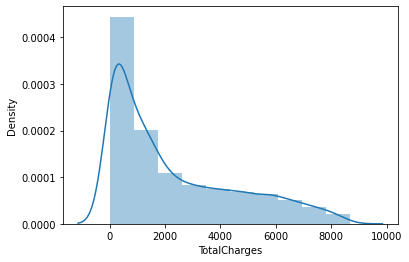

In [115]:
for i in df_num:
    plt.figure()
    sns.distplot(df[i], bins = 10)

### Observations of Violin and Distribution plot

- Tenure spreading similar to whole tenure but in the range of approx 0 to 20 and 60 to 80 having higher density/distribution.


- Monthly charges are in the range of 0 to 20 and 60 to 120 are higher.


- Most of the customer pay Totalcharges in the range of 0 to 4000 approx as per graph.


#### 

### Checking Outliers

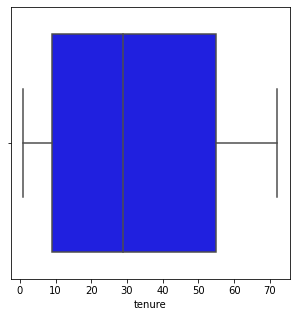

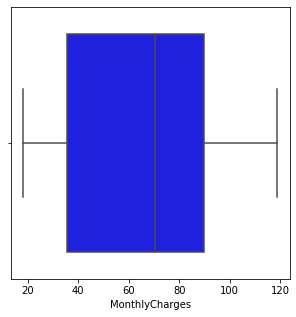

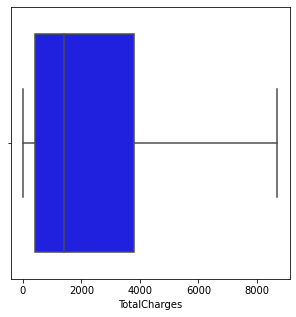

In [116]:
for i in df_num:
    plt.figure(figsize = (5,5))
    sns.boxplot(df[i], orient='v', color='blue')

#### Observations: No Outliers present in the dataset as per graph.

### Checking Skewness

In [117]:
df[df_num].skew()

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

<Figure size 72x36 with 0 Axes>

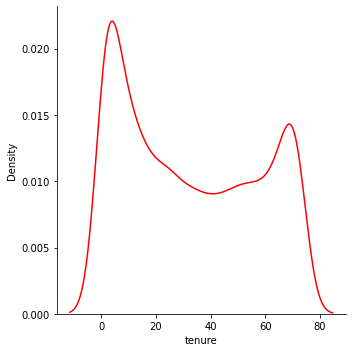

<Figure size 72x36 with 0 Axes>

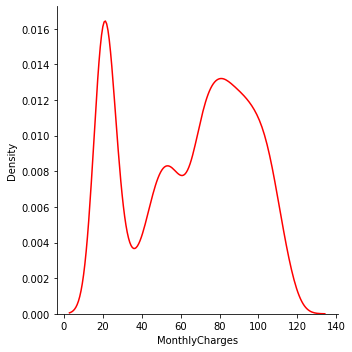

<Figure size 72x36 with 0 Axes>

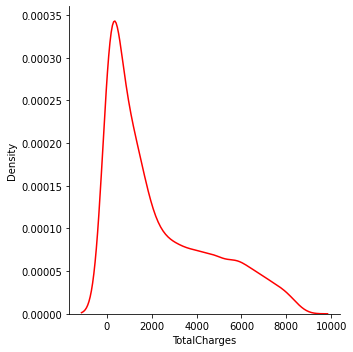

In [118]:
for i in df_num:
    plt.figure(figsize = (1,0.5))
    sns.displot(df[i], kind = 'kde', color = 'red',)

### Observations:
   - tenure and TotalCharges shows right skewed towards the dataset while Monthly charges shows left skewed towards the dataset.

#### 

### Checking Overall of the Dataset by Pairplot

<Figure size 1080x1080 with 0 Axes>

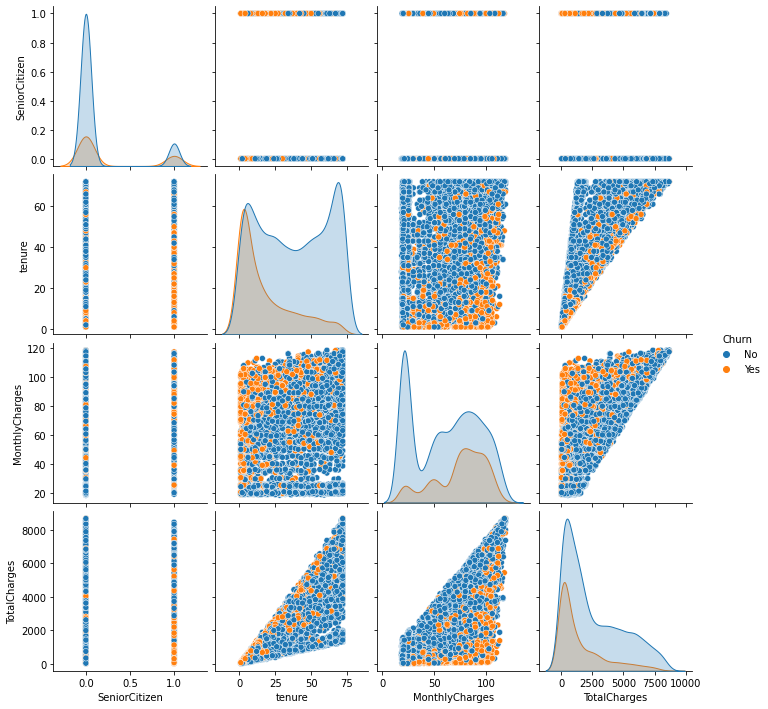

In [45]:
plt.figure(figsize = (15,15))
sns.pairplot(df, hue = 'Churn')

#### Observations: Measured all analysis above are similar to pairplot.

### Label Encoder for target variable

In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [120]:
df['Churn'] = le.fit_transform(df['Churn'])
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


### For making similar predictor variable we are using Ordinal Encoder

In [121]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()

In [122]:
for i in df.select_dtypes(include = 'object').columns:
    df[i] = onc.fit_transform(df[i].values.reshape(-1,1))

df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0


### Removing Outliers from the Dataset

In [123]:
from scipy.stats import zscore

z = np.abs(zscore(df))

# taking thresold value = 3
#np.where(z>3)

df_z = df[(z<3).all(axis = 1)]

In [124]:
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  494,  497,  543,
         568,  595,  609,  615,  619,  633,  659,  666,  668,  673,  676,
         687,  715,  717,  734,  763,  774,  782,  788,  792,  811,  827,
         841,  845,  857,  864,  871,  873,  875,  882,  891,  915,  932,
         938,  940,  957,  970, 1008, 1015, 1034, 1047, 1048, 1050, 1069,
        1106, 1115, 1118, 1140, 1142, 1146, 1157, 1165, 1178, 1200, 1217,
        1221, 1238, 1251, 1253, 1267, 1274, 1294, 1307, 1322, 1327, 1329,
        1330, 1344, 1347, 1360, 1374, 1397, 1402, 1411, 1447, 1474, 1475,
        1476, 1495, 1501, 1508, 1514, 1555, 1557, 1576, 1579, 1609, 1615,
        1629, 1632, 1647, 1684, 1687, 

In [125]:
print(df_z.shape)
print(df.shape)

(6352, 20)
(7032, 20)


In [126]:
percentage = round((7032-6352)/7032*100,2)
print(percentage, "Percentage of data loss")  

9.67 Percentage of data loss


### Removing Outliers with Interquartile Method

In [127]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1

In [128]:
df_IQR = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))).any(axis = 1)]

In [129]:
print(df_IQR.shape)
print(df.shape)

(5314, 20)
(7032, 20)


In [130]:
percentage = round((7032-5314)/7032*100,2)
print(percentage, "Percentage of data loss")  

24.43 Percentage of data loss


#### From above two methods of removing outliers we find that Zscore give lesser data loss within the range of 10 percent hence we can use it. While Interquartile shows higher dataloss hence we can't consider it.

In [131]:
df_z.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.0,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000
mean,0.503463,0.163413,0.485516,0.298331,32.485044,1.0,0.934194,0.965995,0.785264,0.912783,0.905227,0.791247,1.001259,1.005353,0.689389,0.595403,1.571316,67.239625,2367.108588,0.267475
std,0.500027,0.369771,0.499830,0.457562,24.582185,0.0,0.997911,0.715205,0.845403,0.867881,0.867088,0.846900,0.872252,0.872236,0.833498,0.490853,1.068117,30.438439,2328.828347,0.442677
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.787500,415.325000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,74.700000,1422.075000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.0,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,91.250000,4025.800000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

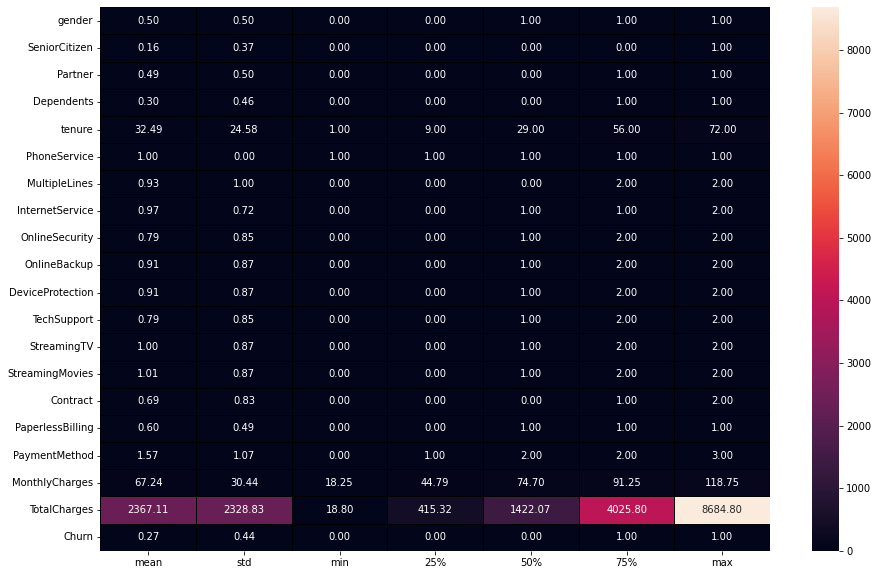

In [132]:
plt.figure(figsize = (15,10))
sns.heatmap(df_z.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually

#### Observations: TotalCharges shows very high max values which shows that column can have higher collinearity and VIF.

### Checking Correlation of the dataset

In [133]:
df_z.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.006468,-0.002949,0.014409,0.001317,NaN,-0.007432,0.000770,-0.016864,-0.009100,-0.002511,-0.009819,-0.005064,-0.002570,-0.000630,-0.018668,0.022975,-0.012250,-0.000478,-0.010944
SeniorCitizen,-0.006468,1.000000,0.015364,-0.211874,0.018197,NaN,0.153747,-0.040309,-0.123456,-0.020346,-0.023388,-0.144461,0.028653,0.047083,-0.139259,0.155259,-0.042667,0.238910,0.109909,0.148483
Partner,-0.002949,0.015364,1.000000,0.454355,0.387383,NaN,0.150561,-0.007544,0.151749,0.155344,0.167586,0.132716,0.134030,0.128751,0.298927,-0.008486,-0.152755,0.092643,0.321314,-0.154345
Dependents,0.014409,-0.211874,0.454355,1.000000,0.164860,NaN,-0.026310,0.050732,0.146099,0.090116,0.083182,0.129857,0.049557,0.025193,0.241361,-0.104661,-0.042090,-0.127317,0.060263,-0.158476
tenure,0.001317,0.018197,0.387383,0.164860,1.000000,NaN,0.361306,-0.037473,0.327275,0.378780,0.368779,0.325392,0.284204,0.293971,0.680128,0.002213,-0.363808,0.244194,0.829839,-0.351333
PhoneService,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,-0.007432,0.153747,0.150561,-0.026310,0.361306,NaN,1.000000,-0.109472,0.007510,0.125726,0.131089,0.011317,0.188587,0.195050,0.116832,0.174509,-0.185863,0.456642,0.466612,0.040207
InternetService,0.000770,-0.040309,-0.007544,0.050732,-0.037473,NaN,-0.109472,1.000000,-0.026141,0.031749,0.050661,-0.021600,0.100018,0.094185,0.112232,-0.165229,0.098812,-0.471765,-0.243774,-0.058796
OnlineSecurity,-0.016864,-0.123456,0.151749,0.146099,0.327275,NaN,0.007510,-0.026141,1.000000,0.198944,0.174573,0.284412,0.048197,0.063483,0.367432,-0.155142,-0.089579,-0.072076,0.255474,-0.289955
OnlineBackup,-0.009100,-0.020346,0.155344,0.090116,0.378780,NaN,0.125726,0.031749,0.198944,1.000000,0.196575,0.210870,0.152814,0.141225,0.285998,-0.019644,-0.127135,0.109726,0.382721,-0.202385


<AxesSubplot:>

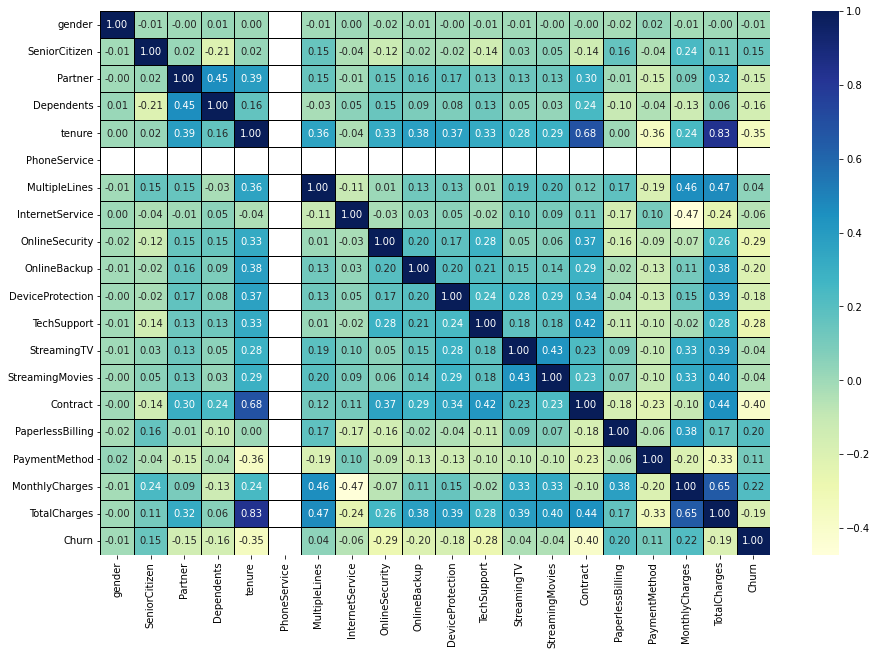

In [134]:
plt.figure(figsize = (15,10))
sns.heatmap(df_z.corr(), annot = True, linecolor = 'black', linewidths = 1, fmt = '.2f', cmap="YlGnBu" )

#### Observations: Tenure, TotalCharges and MonthlyCharges shows very high correlation with respect to each others.

### Checking Positive and Negative Correlation

<AxesSubplot:>

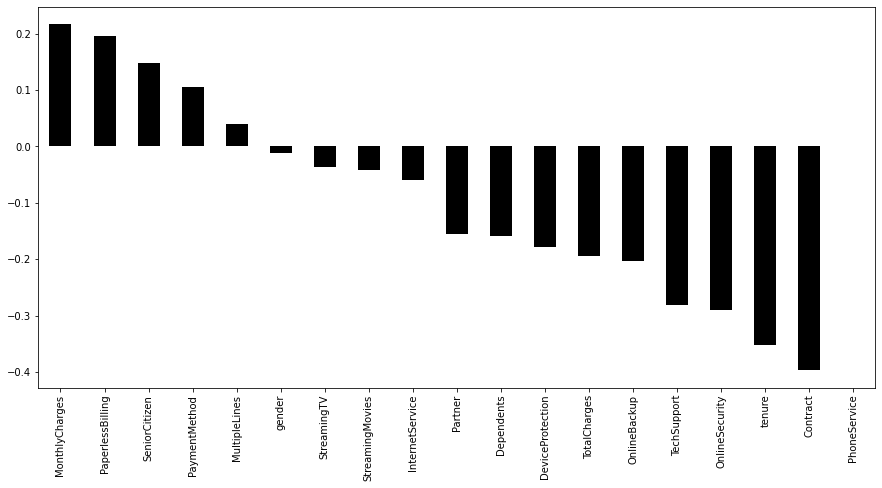

In [135]:
plt.figure(figsize = (15,7))
df_z.corr()['Churn'].sort_values(ascending = False).drop('Churn').plot(kind = 'bar', color = 'k')

#### Observations: MonthlyCharges , PaperlessBilling  , SeniorCitizen , PaymentMethod , MultipleLines shows positive correlation while rest of the dataset shows negative correlation as per graph.

### Dividing data for feature selection

In [136]:
x = df_z.drop('Churn', axis = 1)
y = df_z['Churn']

In [137]:
print('shape of x', x.shape)
print('Shape of y', y.shape)

shape of x (6352, 19)
Shape of y (6352,)


#### Using Get Dummies Method to prevent overfitting of Model as Model having so many columns with Multiple Unique Values¶

In [138]:
x = pd.get_dummies(data = x, columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [139]:
print(x.shape)
x.head(2)

(6352, 44)


,tenure,MonthlyCharges,TotalCharges,gender_0.0,gender_1.0,SeniorCitizen_0.0,SeniorCitizen_1.0,Partner_0.0,Partner_1.0,Dependents_0.0,Dependents_1.0,PhoneService_1.0,MultipleLines_0.0,MultipleLines_2.0,InternetService_0.0,InternetService_1.0,InternetService_2.0,OnlineSecurity_0.0,OnlineSecurity_1.0,OnlineSecurity_2.0,OnlineBackup_0.0,OnlineBackup_1.0,OnlineBackup_2.0,DeviceProtection_0.0,DeviceProtection_1.0,DeviceProtection_2.0,TechSupport_0.0,TechSupport_1.0,TechSupport_2.0,StreamingTV_0.0,StreamingTV_1.0,StreamingTV_2.0,StreamingMovies_0.0,StreamingMovies_1.0,StreamingMovies_2.0,Contract_0.0,Contract_1.0,Contract_2.0,PaperlessBilling_0.0,PaperlessBilling_1.0,PaymentMethod_0.0,PaymentMethod_1.0,PaymentMethod_2.0,PaymentMethod_3.0
1,34,56.95,1889.50,0,1,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


### Removing Skewness

In [140]:
x.skew()

tenure                  0.236305
MonthlyCharges         -0.400997
TotalCharges            0.898862
gender_0.0              0.013858
gender_1.0             -0.013858
SeniorCitizen_0.0      -1.821088
SeniorCitizen_1.0       1.821088
Partner_0.0            -0.057973
Partner_1.0             0.057973
Dependents_0.0         -0.881771
Dependents_1.0          0.881771
PhoneService_1.0        0.000000
MultipleLines_0.0      -0.131929
MultipleLines_2.0       0.131929
InternetService_0.0     1.017624
InternetService_1.0     0.050406
InternetService_2.0     1.222384
OnlineSecurity_0.0      0.049145
OnlineSecurity_1.0      1.222384
OnlineSecurity_2.0      1.019404
OnlineBackup_0.0        0.307808
OnlineBackup_1.0        1.222384
OnlineBackup_2.0        0.691051
DeviceProtection_0.0    0.292178
DeviceProtection_1.0    1.222384
DeviceProtection_2.0    0.709028
TechSupport_0.0         0.061126
TechSupport_1.0         1.222384
TechSupport_2.0         1.002570
StreamingTV_0.0         0.495780
StreamingT

In [141]:
df_num  # taking numerical columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [142]:
x[df_num].skew()

tenure            0.236305
MonthlyCharges   -0.400997
TotalCharges      0.898862
dtype: float64

In [143]:
x_new = x[df_num] # making new instance for checking skewness

### Using Power Transformer method to remove skewness

In [144]:
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer()

In [145]:
x_new = pw.fit_transform(x_new)
x_new = pd.DataFrame(x_new, columns = df_num)

In [146]:
x_new.skew()  # checking impact

tenure           -0.243059
MonthlyCharges   -0.332234
TotalCharges     -0.148761
dtype: float64

#### Skewness are in the acceptable zone hence we are considering it for main dataset.

In [147]:
x[df_num] = pw.fit_transform(x[df_num])
x[df_num].skew()  # skewness done on main dataframe

tenure           -0.243059
MonthlyCharges   -0.332234
TotalCharges     -0.148761
dtype: float64

### Checking Mutlicollinearity

In [148]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [150]:
calc_vif(x[df_num])  # checking VIF of numerical columns

,Variance,VIF Factor
0,tenure,29.526551
1,MonthlyCharges,9.495893
2,TotalCharges,45.690820


#### As we can see that TotalCharges and tenure show high VIF factor but due to lower dataset we can't drop it hence we are considering it for model predictions.

### Using SMOTE to balance the dataset

In [151]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [152]:
x, y = sm.fit_resample(x, y)

<AxesSubplot:xlabel='Churn', ylabel='count'>

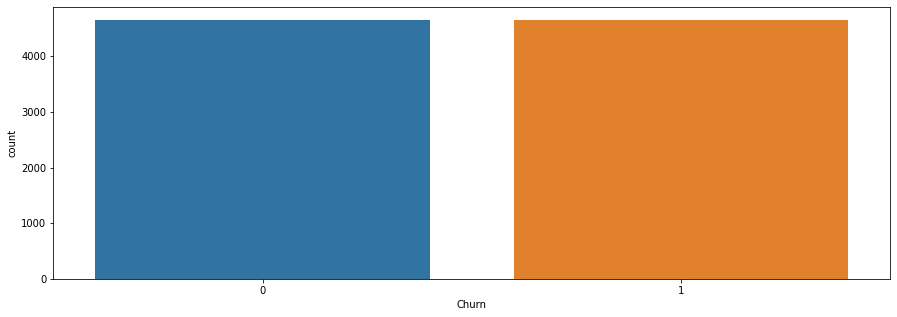

In [153]:
plt.figure(figsize = (15,5))
sns.countplot(y)

### Standard Scalling

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [155]:
x[df_num] = sc.fit_transform(x[df_num])

In [156]:
x = pd.DataFrame(data = x, columns = x.columns)

In [157]:
x.head(5)

,tenure,MonthlyCharges,TotalCharges,gender_0.0,gender_1.0,SeniorCitizen_0.0,SeniorCitizen_1.0,Partner_0.0,Partner_1.0,Dependents_0.0,Dependents_1.0,PhoneService_1.0,MultipleLines_0.0,MultipleLines_2.0,InternetService_0.0,InternetService_1.0,InternetService_2.0,OnlineSecurity_0.0,OnlineSecurity_1.0,OnlineSecurity_2.0,OnlineBackup_0.0,OnlineBackup_1.0,OnlineBackup_2.0,DeviceProtection_0.0,DeviceProtection_1.0,DeviceProtection_2.0,TechSupport_0.0,TechSupport_1.0,TechSupport_2.0,StreamingTV_0.0,StreamingTV_1.0,StreamingTV_2.0,StreamingMovies_0.0,StreamingMovies_1.0,StreamingMovies_2.0,Contract_0.0,Contract_1.0,Contract_2.0,PaperlessBilling_0.0,PaperlessBilling_1.0,PaymentMethod_0.0,PaymentMethod_1.0,PaymentMethod_2.0,PaymentMethod_3.0
0,0.487276,-0.512617,0.343010,0,1,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
1,-1.287207,-0.619661,-1.262154,0,1,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,-1.287207,-0.029161,-1.128187,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,-0.724624,1.027165,-0.251936,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,0.031421,0.636867,0.367829,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0


## Feature Selection

In [158]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [159]:
class best_model:
    def best_fit(x, y, model):
        random_state_values = []
        for i in range(0,100):
            x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)
            training = accuracy_score(pred_train, y_train)
            testing = accuracy_score(pred_test, y_test)
            
            if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
            #if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
                print("At random_state:-", i)
                print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
                print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x, y, model, i):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = accuracy_score(pred_train, y_train)
        Test_accuracy = accuracy_score(pred_test, y_test)
        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Confusion Matrix')
        print(confusion_matrix(pred_test, y_test) )
        print("\n")
        print('Classification Report')
        print(classification_report(pred_test, y_test) )
        

    def cross_val_score(model, x, y):
        for value in range(2,10):
            cv = cross_val_score(model, x, y, cv = value).mean()
            print('cross_val_score', cv*100,'at cv =', value,"\n")


## Model 1 Logisitc Regression

In [160]:
model = LogisticRegression()

In [161]:
best_model.best_fit(x, y, model)   #finding best random state

At random_state:- 6
Training accuracy_score is:- 84.57169174086583
Testing accuracy_score is:- 84.5272206303725


At random_state:- 7
Training accuracy_score is:- 84.46423088731963
Testing accuracy_score is:- 84.38395415472779


At random_state:- 14
Training accuracy_score is:- 84.72520724593184
Testing accuracy_score is:- 85.31518624641834


At random_state:- 25
Training accuracy_score is:- 85.29321461467609
Testing accuracy_score is:- 84.59885386819485


At random_state:- 26
Training accuracy_score is:- 84.72520724593184
Testing accuracy_score is:- 85.06446991404012


At random_state:- 30
Training accuracy_score is:- 84.67915259441203
Testing accuracy_score is:- 85.42263610315186


At random_state:- 32
Training accuracy_score is:- 84.57169174086583
Testing accuracy_score is:- 85.02865329512895


At random_state:- 35
Training accuracy_score is:- 84.80196499846484
Testing accuracy_score is:- 84.56303724928367


At random_state:- 36
Training accuracy_score is:- 84.57169174086583
Testing

#### Model giving best accuracy score at random state value 99

In [163]:
best_model.final_model(x, y, model, 99)

At random state 99 model giving best accuracy score 

Training accuracy:-  85.06294135707707
Testing accuracy:-  85.02865329512895


--------------------------------------
Confusion Matrix
[[1204  205]
 [ 213 1170]]


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1409
           1       0.85      0.85      0.85      1383

    accuracy                           0.85      2792
   macro avg       0.85      0.85      0.85      2792
weighted avg       0.85      0.85      0.85      2792



In [164]:
best_model.cross_val_score(model, x, y)

cross_val_score 80.49645390070921 at cv = 2 

cross_val_score 82.05458843756716 at cv = 3 

cross_val_score 83.30235624197013 at cv = 4 

cross_val_score 83.50640168395195 at cv = 5 

cross_val_score 83.58048570814529 at cv = 6 

cross_val_score 83.8945881310823 at cv = 7 

cross_val_score 84.07675965405265 at cv = 8 

cross_val_score 84.22523103374166 at cv = 9 



## Model 2 GaussianNB

In [165]:
model = GaussianNB()

In [166]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 1
Training accuracy_score is:- 76.11298741172858
Testing accuracy_score is:- 76.07449856733524


At random_state:- 2
Training accuracy_score is:- 76.00552655818238
Testing accuracy_score is:- 75.96704871060172


At random_state:- 4
Training accuracy_score is:- 76.02087810868898
Testing accuracy_score is:- 76.11031518624641


At random_state:- 6
Training accuracy_score is:- 76.08228431071538
Testing accuracy_score is:- 75.68051575931231


At random_state:- 8
Training accuracy_score is:- 76.23579981578139
Testing accuracy_score is:- 75.50143266475645


At random_state:- 9
Training accuracy_score is:- 75.97482345716917
Testing accuracy_score is:- 75.68051575931231


At random_state:- 10
Training accuracy_score is:- 76.12833896223519
Testing accuracy_score is:- 75.68051575931231


At random_state:- 11
Training accuracy_score is:- 75.85201105311637
Testing accuracy_score is:- 76.25358166189112


At random_state:- 15
Training accuracy_score is:- 75.99017500767577
Testing ac

#### Model giving best accuracy score at random state value 64

In [168]:
best_model.final_model(x, y, model, 64)

At random state 64 model giving best accuracy score 

Training accuracy:-  76.06693276020879
Testing accuracy:-  76.07449856733524


--------------------------------------
Confusion Matrix
[[ 901  190]
 [ 478 1223]]


Classification Report
              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1091
           1       0.87      0.72      0.79      1701

    accuracy                           0.76      2792
   macro avg       0.76      0.77      0.76      2792
weighted avg       0.78      0.76      0.76      2792



In [169]:
best_model.cross_val_score(model, x, y)

cross_val_score 75.85428755641522 at cv = 2 

cross_val_score 75.9939823769611 at cv = 3 

cross_val_score 75.97248975631314 at cv = 4 

cross_val_score 76.00463698587838 at cv = 5 

cross_val_score 75.9939823769611 at cv = 6 

cross_val_score 75.9724933100245 at cv = 7 

cross_val_score 75.97252447308625 at cv = 8 

cross_val_score 76.0047281323877 at cv = 9 



## Model 3 SGD Classifier

In [170]:
model = SGDClassifier()

In [171]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 0
Training accuracy_score is:- 82.89837273564629
Testing accuracy_score is:- 82.6647564469914


At random_state:- 5
Training accuracy_score is:- 83.15934909425852
Testing accuracy_score is:- 83.2378223495702


At random_state:- 8
Training accuracy_score is:- 82.05403745778324
Testing accuracy_score is:- 81.87679083094555


At random_state:- 9
Training accuracy_score is:- 84.2800122812404
Testing accuracy_score is:- 84.34813753581662


At random_state:- 10
Training accuracy_score is:- 83.74270801350936
Testing accuracy_score is:- 84.38395415472779


At random_state:- 17
Training accuracy_score is:- 84.2339576297206
Testing accuracy_score is:- 84.16905444126076


At random_state:- 19
Training accuracy_score is:- 83.97298127110838
Testing accuracy_score is:- 84.38395415472779


At random_state:- 24
Training accuracy_score is:- 80.3653669020571
Testing accuracy_score is:- 80.05014326647564


At random_state:- 26
Training accuracy_score is:- 81.07153822536077
Testing accur

#### Model giving best accuracy score at random state value 92

In [173]:
best_model.final_model(x, y, model, 92)

At random state 92 model giving best accuracy score 

Training accuracy:-  84.14184832668099
Testing accuracy:-  84.56303724928367


--------------------------------------
Confusion Matrix
[[1229  276]
 [ 155 1132]]


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1505
           1       0.80      0.88      0.84      1287

    accuracy                           0.85      2792
   macro avg       0.85      0.85      0.85      2792
weighted avg       0.85      0.85      0.85      2792



In [174]:
best_model.cross_val_score(model, x, y)

cross_val_score 79.03503116269074 at cv = 2 

cross_val_score 82.73157102944336 at cv = 3 

cross_val_score 82.69041396356133 at cv = 4 

cross_val_score 82.14134207092152 at cv = 5 

cross_val_score 82.73157102944339 at cv = 6 

cross_val_score 80.32876451043765 at cv = 7 

cross_val_score 82.01402677930344 at cv = 8 

cross_val_score 83.19363851278744 at cv = 9 



## Model 4 AdaBoostClassifier

In [175]:
model = AdaBoostClassifier()

In [176]:
best_model.best_fit(x, y, model)  # finding best random state

At random_state:- 1
Training accuracy_score is:- 80.48817930610991
Testing accuracy_score is:- 80.05014326647564


At random_state:- 9
Training accuracy_score is:- 80.81056186674854
Testing accuracy_score is:- 80.51575931232091


At random_state:- 13
Training accuracy_score is:- 80.2886091495241
Testing accuracy_score is:- 80.26504297994269


At random_state:- 14
Training accuracy_score is:- 80.65704636168253
Testing accuracy_score is:- 81.12464183381088


At random_state:- 15
Training accuracy_score is:- 80.50353085661652
Testing accuracy_score is:- 80.80229226361033


At random_state:- 18
Training accuracy_score is:- 80.58028860914952
Testing accuracy_score is:- 80.65902578796562


At random_state:- 19
Training accuracy_score is:- 80.97942892232115
Testing accuracy_score is:- 80.69484240687679


At random_state:- 20
Training accuracy_score is:- 80.58028860914952
Testing accuracy_score is:- 81.01719197707736


At random_state:- 21
Training accuracy_score is:- 80.59564015965613
Testing

#### Model giving best accuracy score at random state value 74

In [177]:
best_model.final_model(x, y, model, 74)

At random state 74 model giving best accuracy score 

Training accuracy:-  80.79521031624193
Testing accuracy:-  80.83810888252148


--------------------------------------
Confusion Matrix
[[1078  200]
 [ 335 1179]]


Classification Report
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1278
           1       0.85      0.78      0.82      1514

    accuracy                           0.81      2792
   macro avg       0.81      0.81      0.81      2792
weighted avg       0.81      0.81      0.81      2792



In [178]:
best_model.cross_val_score(model, x, y)

cross_val_score 78.7986245433054 at cv = 2 

cross_val_score 79.07801418439716 at cv = 3 

cross_val_score 79.94868272228403 at cv = 4 

cross_val_score 80.08841094060861 at cv = 5 

cross_val_score 80.07736943907156 at cv = 6 

cross_val_score 80.09972528871356 at cv = 7 

cross_val_score 80.01357543442869 at cv = 8 

cross_val_score 80.04513217279174 at cv = 9 



## Model 5 GradientBoostingClassifer

In [179]:
model = GradientBoostingClassifier()

In [180]:
best_model.best_fit(x, y, model)  # finding best random state

At random_state:- 33
Training accuracy_score is:- 84.69450414491864
Testing accuracy_score is:- 84.88538681948424


At random_state:- 62
Training accuracy_score is:- 84.46423088731963
Testing accuracy_score is:- 83.88252148997135


At random_state:- 87
Training accuracy_score is:- 84.81731654897145
Testing accuracy_score is:- 85.35100286532952


Best fit random_state_values [33, 62, 87]


#### Model giving best accuracy score at random state value 33

In [181]:
best_model.final_model(x, y, model, 33)

At random state 33 model giving best accuracy score 

Training accuracy:-  84.69450414491864
Testing accuracy:-  84.88538681948424


--------------------------------------
Confusion Matrix
[[1149  187]
 [ 235 1221]]


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1336
           1       0.87      0.84      0.85      1456

    accuracy                           0.85      2792
   macro avg       0.85      0.85      0.85      2792
weighted avg       0.85      0.85      0.85      2792



In [182]:
best_model.cross_val_score(model, x, y)

cross_val_score 80.20631850419085 at cv = 2 

cross_val_score 81.61401246507629 at cv = 3 

cross_val_score 82.63554201842294 at cv = 4 

cross_val_score 82.53881037128785 at cv = 5 

cross_val_score 82.92499462712229 at cv = 6 

cross_val_score 83.17367103666939 at cv = 7 

cross_val_score 83.15196434744838 at cv = 8 

cross_val_score 83.1184182248012 at cv = 9 



## Finalizing Best Models

In [189]:
# models                 accuracy_score_training  accuracy_score_training    CV score        CV state    Differences in accuracy

# LogisticRegression       85.06294135707707       85.02865329512895      84.22523103374166     9      0.03428806194811784
# GaussianNB               76.06693276020879       76.07449856733524      75.9939823769611      6      0.00756580712645416
# SGDClassifier            84.14184832668099       84.56303724928367      83.19363851278744     9      0.42118892260268126
# AdaboostClassifier       80.79521031624193      80.83810888252148      80.09972528871356     7      0.04289856627954691
# GradientBoostingclassifier 84.69450414491864    84.88538681948424      83.17367103666939     7      0.19088267456560004

### Observations:-
- LogisticRegression: Model shows similar training and testing accuracy but accuracy score is higher than other models hence we can consider it for model building.


- GassianNB: Model shows similar training and testing accuracy but accuracy score is very less hence we can't consider it for model building.


- SGDClassifier: Model shows similar training and testing accuracy but accuracy score is less than logistics regression hence we can't consider it for model building.


- AdaboostClassifier: Model shows similar training and testing accuracy but accuracy score is very less hence we can't consider it for model building.

    
- GradientBoostingClassifier: Model shows similar training and testing accuracy but accuracy score is less than logistics regression hence we can't consider it for model building.


### Ensemble Technique

In [193]:
# using hyper parameter tuning for Support Vector Classifier to find out best criterion

model = LogisticRegression()

# #default params:penalty='l2',
#     *,
#     dual=False,
#     tol=0.0001,
#     C=1.0,
#     fit_intercept=True,
#     intercept_scaling=1,
#     class_weight=None,
#     random_state=None,
#     solver='lbfgs',
#     max_iter=100,
#     multi_class='auto',
#     verbose=0,
#     warm_start=False,
#     n_jobs=None,
#     l1_ratio=None,

param = {'penalty':['l1', 'l2', 'elasticnet'],
        'max_iter': [50,100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'multi_class': ['auto', 'ovr', 'multinomial']}

gd = GridSearchCV(model, param_grid=param, cv = 9)
gd.fit(x, y)
gd.best_params_
#{'max_iter': 50, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}

{'max_iter': 50, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}

## Final Model LogisticRegression

In [194]:
model = LogisticRegression(max_iter=50, multi_class= 'auto', penalty = 'l2', solver = 'lbfgs')

In [195]:
best_model.best_fit(x, y, model)  #finding best random state with best params

At random_state:- 5
Training accuracy_score is:- 84.35677003377342
Testing accuracy_score is:- 84.31232091690545


At random_state:- 6
Training accuracy_score is:- 84.72520724593184
Testing accuracy_score is:- 84.59885386819485


At random_state:- 7
Training accuracy_score is:- 84.57169174086583
Testing accuracy_score is:- 84.81375358166189


At random_state:- 9
Training accuracy_score is:- 84.81731654897145
Testing accuracy_score is:- 84.81375358166189


At random_state:- 25
Training accuracy_score is:- 85.30856616518268
Testing accuracy_score is:- 84.59885386819485


At random_state:- 26
Training accuracy_score is:- 84.70985569542523
Testing accuracy_score is:- 85.06446991404012


At random_state:- 30
Training accuracy_score is:- 84.67915259441203
Testing accuracy_score is:- 85.20773638968481


At random_state:- 32
Training accuracy_score is:- 84.83266809947804
Testing accuracy_score is:- 84.92120343839542


At random_state:- 33
Training accuracy_score is:- 84.67915259441203
Testing 

#### At Random State 57 model gives best accuracy score

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 57)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("At random state", 11 , "model giving best accuracy score","\n")
Train_accuracy = accuracy_score(pred_train, y_train)
Test_accuracy = accuracy_score(pred_test, y_test)
print('Training accuracy:- ', Train_accuracy*100)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(pred_test, y_test) )
print("\n")
print('Classification Report')
print(classification_report(pred_test, y_test) )   # at random state 60 model shows best accuracy

At random state 11 model giving best accuracy score 

Training accuracy:-  85.12434755910347
Testing accuracy:-  85.17191977077364


--------------------------------------
Confusion Matrix
[[1227  236]
 [ 178 1151]]


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1463
           1       0.83      0.87      0.85      1329

    accuracy                           0.85      2792
   macro avg       0.85      0.85      0.85      2792
weighted avg       0.85      0.85      0.85      2792



### Using Predict Proba function for finding accuracy target variable

In [197]:
final_pred_prob = model.predict_proba(x_test)[:,1]

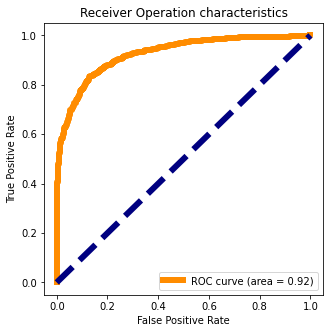

In [198]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresolds = roc_curve(y_test, final_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 6, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw = 6, linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation characteristics")
plt.legend(loc = "lower right")
plt.show()

### Deploy Model

In [199]:
import pickle

filename = "Customer_churn.pkl"
pickle.dump(model, open(filename, 'wb'))

### Loading Model

In [200]:
load = pickle.load(open('Customer_churn.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.8517191977077364


### Conclusion

In [201]:
conclusion = pd.DataFrame()
conclusion['Predicted Customer_Churn'] = np.array(model.predict(x_test))
conclusion['Actual Customer_Churn'] = np.array(y_test)

In [205]:
conclusion.sample(25)

,Predicted Customer_Churn,Actual Customer_Churn
1917,1,1
435,0,0
2483,0,0
2541,1,1
1619,1,1
348,0,0
2364,0,0
340,0,0
477,1,1
2640,1,1
